<a href="https://colab.research.google.com/github/gsanc018/Forecasting/blob/main/3_3_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Download Data
!pip install keras_tuner -q

# import cryptocompare as cc
import requests
import IPython
import yaml
import json
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

# alternatively if you have not stored your API key in a separate file
api_key = 'b234d4305f5d1c5b9bb158e2cbb35da6703d86dd76e6d5c2f4b2fe4655ab3104'

# Number of past days for which we retrieve data
data_limit = 2000

# Define coin symbols
symbol_a = 'BTC'
symbol_b = 'ETH'

# Query price data

# Generic function for an API call to a given URL
def api_call(url):
  # Set API Key as Header
  headers = {'authorization': 'Apikey ' + api_key,}
  session = requests.Session()
  session.headers.update(headers)

  # API call to cryptocompare
  response = session.get(url)

  # Conversion of the response to dataframe
  historic_blockdata_dict = json.loads(response.text)
  df = pd.DataFrame.from_dict(historic_blockdata_dict.get('Data').get('Data'), orient='columns', dtype=None, columns=None)
  return df

def prepare_pricedata(df):
  df['date'] = pd.to_datetime(df['time'], unit='s')
  df.drop(columns=['time', 'conversionType', 'conversionSymbol'], inplace=True)
  return df

# Load the price data
base_url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym='


C=prepare_pricedata(api_call(f'{base_url}{symbol_a}&tsym=USD&limit={data_limit}&toTs={1678838400}'))
B=prepare_pricedata(api_call(f'{base_url}{symbol_a}&tsym=USD&limit={data_limit}&toTs={1506038400}'))
A=prepare_pricedata(api_call(f'{base_url}{symbol_a}&tsym=USD&limit={data_limit}&toTs={1333238400}'))

price_data = pd.concat([A[:-1],B[:-1],C]).reset_index(drop = True)
df = pd.DataFrame(price_data.close)
# get the index of the first non-null row
first_nonzero_row = df.index[df.apply(lambda x: x.ne(0)).any(1)][0]

price_data = price_data.set_index('date')[first_nonzero_row:]
price_data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.1 MB/s eta 0:00:00


<ipython-input-2-5c66221a7ab5>:57: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  first_nonzero_row = df.index[df.apply(lambda x: x.ne(0)).any(1)][0]


,high,low,open,volumefrom,volumeto,close
date,,,,,,
2010-07-17,0.04951,0.04951,0.04951,20.00,9.902000e-01,0.04951
2010-07-18,0.08585,0.05941,0.04951,75.01,5.092000e+00,0.08584
2010-07-19,0.09307,0.07723,0.08584,574.00,4.966000e+01,0.08080
2010-07-20,0.08181,0.07426,0.08080,262.00,2.059000e+01,0.07474
2010-07-21,0.07921,0.06634,0.07474,575.00,4.226000e+01,0.07921
...,...,...,...,...,...,...
2023-03-11,20847.54000,19898.92000,20207.71000,69272.41,1.413062e+09,20610.50000
2023-03-12,22215.00000,20448.60000,20610.50000,63908.60,1.351176e+09,22180.75000
2023-03-13,24575.29000,21897.79000,22180.75000,94186.56,2.191332e+09,24205.82000


In [ ]:
# Prepare the onchain dataframe
def prepare_onchain_data(df):
  # replace the timestamp with a data and filter some faulty values
  df['date'] = pd.to_datetime(df['time'], unit='s')
  df.drop(columns='time', inplace=True)
  df = df[df['hashrate'] > 0.0]
  return df

# Load onchain data for Bitcoin
base_url = 'https://min-api.cryptocompare.com/data/blockchain/histo/day?fsym='

C = prepare_onchain_data(api_call(f'{base_url}{symbol_a}&limit={data_limit}&toTs={1678838400}'))
B = prepare_onchain_data(api_call(f'{base_url}{symbol_a}&limit={data_limit}&toTs={1506038400}'))
A = prepare_onchain_data(api_call(f'{base_url}{symbol_a}&limit={data_limit}&toTs={1333238400}'))

on_chain_data = pd.concat([A[:-1],B[:-1],C]).reset_index(drop = True)
on_chain_data = on_chain_data.iloc[:,2:].set_index('date')
on_chain_data

,zero_balance_addresses_all_time,unique_addresses_all_time,new_addresses,active_addresses,transaction_count,transaction_count_all_time,large_transaction_count,average_transaction_value,block_height,hashrate,difficulty,block_time,block_size,current_supply
date,,,,,,,,,,,,,,
2009-01-09,0,15,14,14,14,15,0,50.000000,14,9.425148e-06,1.000000e+00,455.692308,215,750.0
2009-01-10,0,76,61,61,61,76,0,50.000000,75,3.730645e-06,1.000000e+00,1151.266667,215,3800.0
2009-01-11,0,169,93,93,93,169,0,50.000000,168,4.669160e-06,1.000000e+00,919.858696,215,8450.0
2009-01-12,2,270,101,102,101,270,0,48.306931,262,5.440074e-06,1.000000e+00,789.505376,234,13150.0
2009-01-13,2,393,123,123,123,393,0,50.000000,385,6.124981e-06,1.000000e+00,701.221311,215,19300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-11,1077290892,1121332087,499911,975440,319707,813242743,17025,2.938892,780376,3.579841e+08,4.355172e+13,522.518293,2271631,19314856.0
2023-03-12,1077725223,1121759506,427419,891560,265555,813508298,12195,2.520330,780537,3.582923e+08,4.355172e+13,522.068750,2356654,19315875.0
2023-03-13,1078152116,1122239218,479712,995257,333107,813841405,18470,3.483540,780694,3.415817e+08,4.355172e+13,547.608974,2066050,19316850.0


In [ ]:
!pip install ta -q

  Preparing metadata (setup.py) ... done


In [ ]:

import pandas as pd
import ta

# Assuming price_data DataFrame with 'high', 'low', 'open', 'close', and 'volumefrom' columns

# Initialize a new DataFrame for technical indicators
technical_indicators = pd.DataFrame(index=price_data.index)

# Calculate Simple Moving Average (SMA)
technical_indicators['SMA_10'] = ta.trend.sma_indicator(close=price_data['close'], window=10)
technical_indicators['SMA_50'] = ta.trend.sma_indicator(close=price_data['close'], window=50)

# Calculate Exponential Moving Average (EMA)
technical_indicators['EMA_10'] = ta.trend.ema_indicator(close=price_data['close'], window=10)
technical_indicators['EMA_50'] = ta.trend.ema_indicator(close=price_data['close'], window=50)

# Calculate Bollinger Bands
bb = ta.volatility.BollingerBands(close=price_data['close'], window=20, window_dev=2)
technical_indicators['BB_upper'] = bb.bollinger_hband()
technical_indicators['BB_middle'] = bb.bollinger_mavg()
technical_indicators['BB_lower'] = bb.bollinger_lband()

# Calculate Relative Strength Index (RSI)
technical_indicators['RSI'] = ta.momentum.rsi(close=price_data['close'], window=14)

# Calculate Moving Average Convergence Divergence (MACD)
technical_indicators['MACD'] = ta.trend.macd(close=price_data['close'], window_fast=12, window_slow=26)

# Calculate Stochastic Oscillator
technical_indicators['Stoch_Osc'] = ta.momentum.stoch(close=price_data['close'], high=price_data['high'], low=price_data['low'], window=14, smooth_window=3)

# Calculate On-Balance Volume (OBV)
technical_indicators['OBV'] = ta.volume.on_balance_volume(close=price_data['close'], volume=price_data['volumefrom'])

# Remove rows with missing values
technical_indicators = technical_indicators.dropna()

technical_indicators

,SMA_10,SMA_50,EMA_10,EMA_50,BB_upper,BB_middle,BB_lower,RSI,MACD,Stoch_Osc,OBV
date,,,,,,,,,,,
2010-09-04,0.06316,0.064282,0.063062,0.062230,0.069141,0.064721,0.060300,47.574271,-0.000427,82.054757,48584.79
2010-09-05,0.06292,0.064524,0.062796,0.062205,0.069131,0.064525,0.059920,46.233662,-0.000530,79.940363,40125.55
2010-09-06,0.06258,0.064039,0.062579,0.062181,0.068134,0.064106,0.060077,46.233662,-0.000605,79.940363,41035.55
2010-09-07,0.06227,0.063643,0.062292,0.062135,0.067581,0.063755,0.059930,45.099875,-0.000704,78.313906,37578.36
2010-09-08,0.06207,0.063388,0.062239,0.062130,0.067167,0.063521,0.059874,47.414458,-0.000694,81.024668,39923.77
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-11,21811.97700,22940.370000,21603.573552,22125.748214,25329.636605,22785.823500,20242.010395,33.476494,-581.040317,23.208183,12602772.64
2023-03-12,21683.33000,22928.186600,21708.514725,22127.905147,25025.978578,22652.956500,20279.934422,48.562529,-506.755538,59.178540,12666681.24
2023-03-13,21867.76700,22958.003200,22162.570229,22209.392004,24978.815651,22640.722500,20302.629349,60.882873,-281.236176,92.577824,12760867.80


In [ ]:
print(price_data.shape)
print(on_chain_data.shape)
print(technical_indicators.shape)

(4625, 6)
(5175, 14)
(4576, 11)


In [ ]:
data = price_data.join(on_chain_data).join(technical_indicators)
data

,high,low,open,volumefrom,volumeto,close,zero_balance_addresses_all_time,unique_addresses_all_time,new_addresses,active_addresses,...,SMA_50,EMA_10,EMA_50,BB_upper,BB_middle,BB_lower,RSI,MACD,Stoch_Osc,OBV
date,,,,,,,,,,,,,,,,,,,,,
2010-07-17,0.04951,0.04951,0.04951,20.00,9.902000e-01,0.04951,3.472700e+04,8.697900e+04,447.0,804.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-18,0.08585,0.05941,0.04951,75.01,5.092000e+00,0.08584,3.525700e+04,8.744600e+04,467.0,917.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-19,0.09307,0.07723,0.08584,574.00,4.966000e+01,0.08080,3.574400e+04,8.805100e+04,605.0,972.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-20,0.08181,0.07426,0.08080,262.00,2.059000e+01,0.07474,3.625700e+04,8.872500e+04,674.0,906.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-21,0.07921,0.06634,0.07474,575.00,4.226000e+01,0.07921,3.667900e+04,8.919400e+04,469.0,809.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-11,20847.54000,19898.92000,20207.71000,69272.41,1.413062e+09,20610.50000,1.077291e+09,1.121332e+09,499911.0,975440.0,...,22940.3700,21603.573552,22125.748214,25329.636605,22785.8235,20242.010395,33.476494,-581.040317,23.208183,12602772.64
2023-03-12,22215.00000,20448.60000,20610.50000,63908.60,1.351176e+09,22180.75000,1.077725e+09,1.121760e+09,427419.0,891560.0,...,22928.1866,21708.514725,22127.905147,25025.978578,22652.9565,20279.934422,48.562529,-506.755538,59.178540,12666681.24
2023-03-13,24575.29000,21897.79000,22180.75000,94186.56,2.191332e+09,24205.82000,1.078152e+09,1.122239e+09,479712.0,995257.0,...,22958.0032,22162.570229,22209.392004,24978.815651,22640.7225,20302.629349,60.882873,-281.236176,92.577824,12760867.80


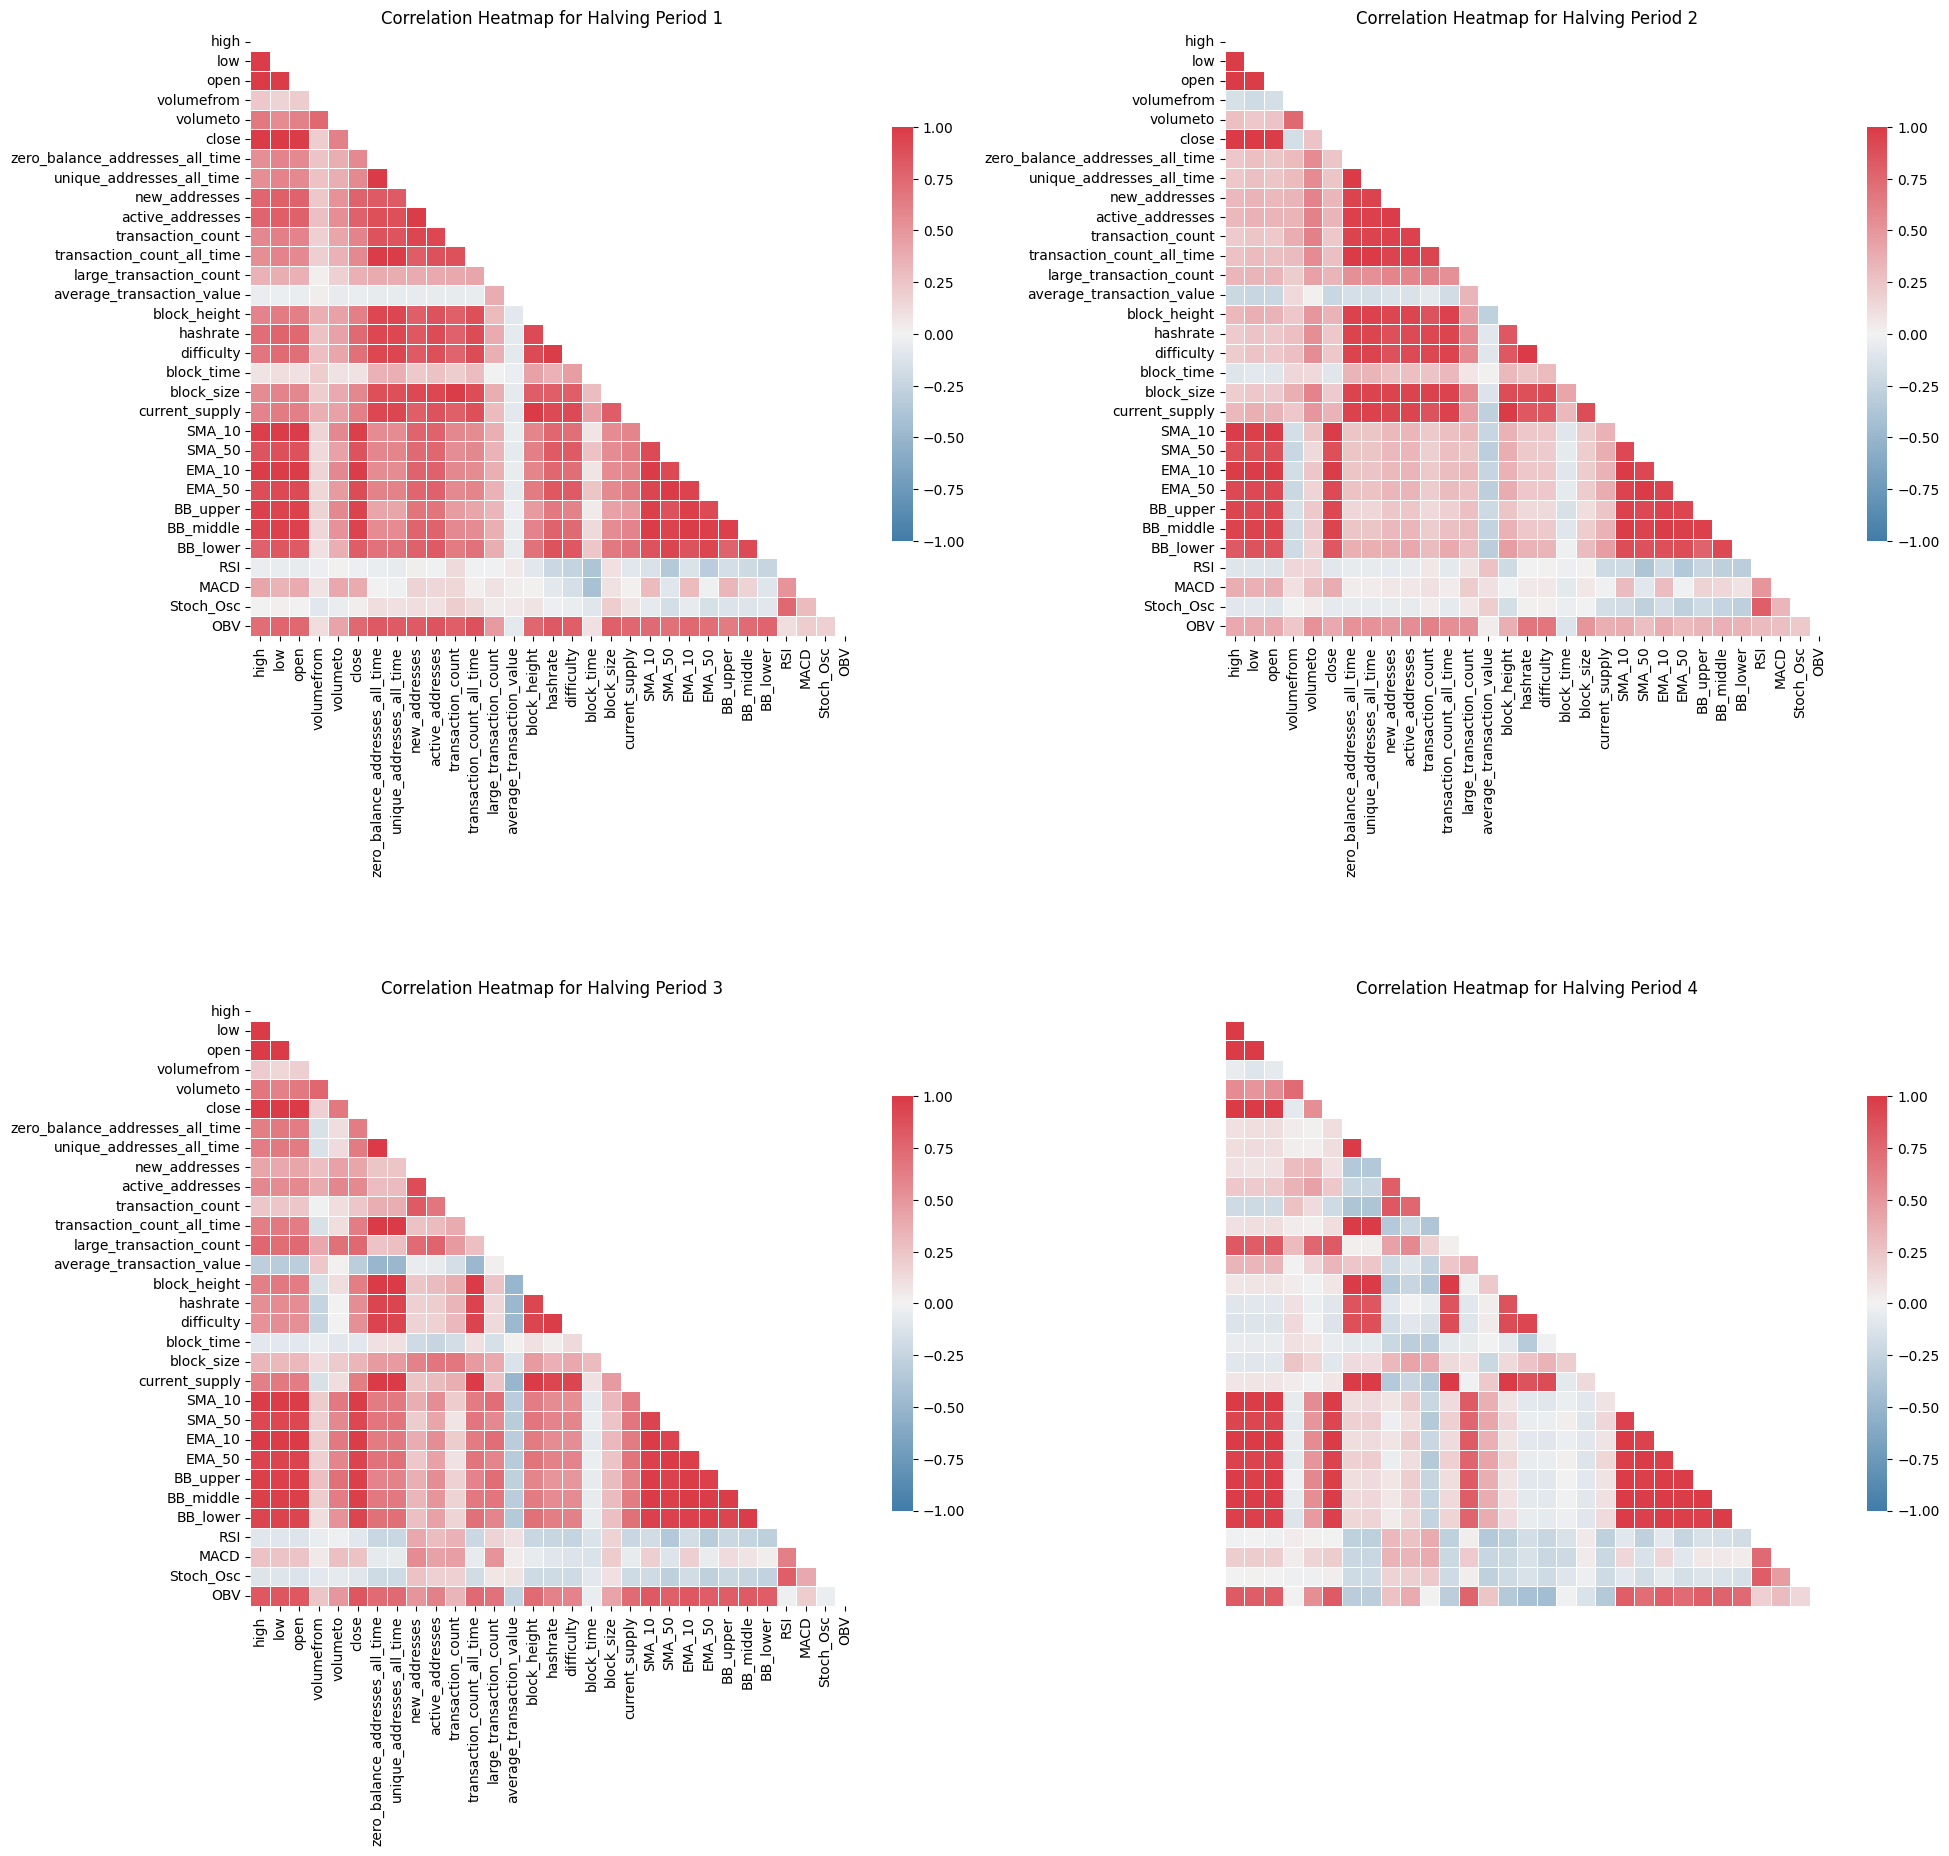

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# List of halving dates
halving_dates = ['2012-11-28', '2016-07-09', '2020-05-11']

# Calculate the correlation matrices for each halving period
correlation_matrices = []
for i in range(len(halving_dates) + 1):
    if i == 0:
        start_date = data.index.min()
        end_date = halving_dates[i]
    elif i == len(halving_dates):
        start_date = halving_dates[i - 1]
        end_date = data.index.max()
    else:
        start_date = halving_dates[i - 1]
        end_date = halving_dates[i]

    period_data = data.loc[start_date:end_date]
    corr_matrix = period_data.corr()
    correlation_matrices.append(corr_matrix)

# Create 2x2 subplots for correlation heatmaps
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axes = axes.flatten()

# Define colormap for positive correlations
cmap = sns.diverging_palette(240, 10, n=100, as_cmap=True)

# Plot a heatmap for each correlation matrix
for i, corr_matrix in enumerate(correlation_matrices):
    ax = axes[i]
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, ax=ax, annot=False)
    ax.set_title(f'Correlation Heatmap for Halving Period {i + 1}')

# Remove the unused subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.close.values.reshape(-1,1))

4162
(4131, 30) (432, 30)
(4131,) (432,)
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best RandomForest hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best XGBoost hyperparameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RandomForest hyperparameters (RandomizedSearch): {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best XGBoost hyperparameters (RandomizedSearch): {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.2}
RandomForest Evaluation Metrics:
RMSE: 3331.807350609053
MAE: 2639.0503618375315
MSLE: 0.018912918249695813


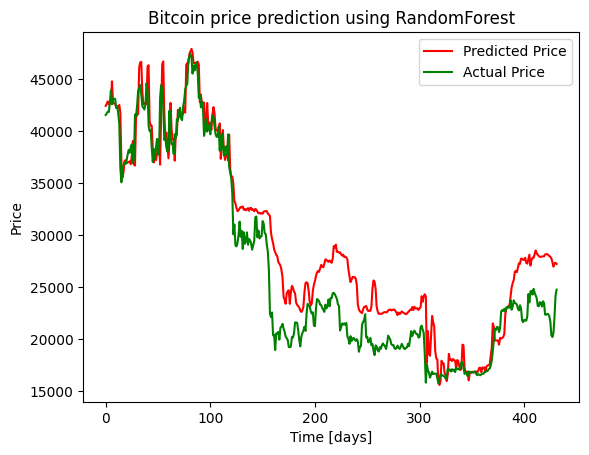

XGBoost Evaluation Metrics:
RMSE: 5014.9249723568955
MAE: 3865.4500364402484
MSLE: 0.03973244273470497


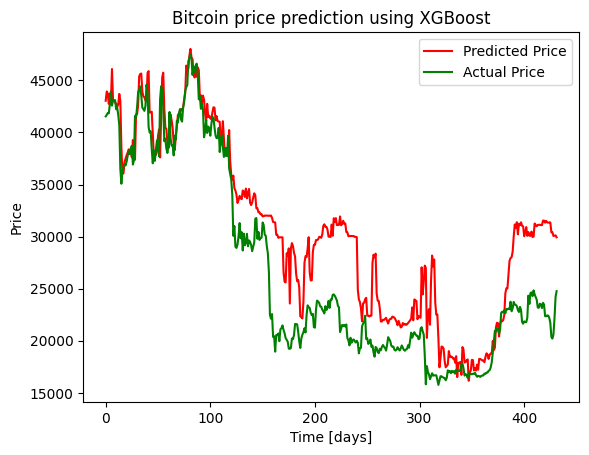

In [ ]:
# Split data
train_size = int(len(data) * 0.9)
train_data = data[0:train_size, :]
test_data = data[train_size:len(data), :]

# Define window size
window_size = 30

# Prepare data for LSTM model
def prepare_data(data, window_size):
    X, Y = [], []
    for i in range(len(data)-window_size-1):
        X.append(data[i:(i+window_size), 0])
        Y.append(data[i + window_size, 0])
    return np.array(X), np.array(Y)

train_X, train_Y = prepare_data(train_data, window_size)
test_X, test_Y = prepare_data(test_data, window_size)

print(train_size)
print(train_X.shape,test_X.shape)
print(train_Y.shape,test_Y.shape)

# Prepare the data
train_X = train_X.reshape(-1, window_size)
test_X = test_X.reshape(-1, window_size)


# Parameter grid for RandomForest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.8, 1.0]
}

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# RandomForest GridSearchCV
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
rf_grid_search.fit(train_X, train_Y)
best_rf_params = rf_grid_search.best_params_
print("Best RandomForest hyperparameters:", best_rf_params)

# XGBoost GridSearchCV
xgb_grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42), param_grid=xgb_param_grid, cv=5, n_jobs=-1, verbose=2)
xgb_grid_search.fit(train_X, train_Y)
best_xgb_params = xgb_grid_search.best_params_
print("Best XGBoost hyperparameters:", best_xgb_params)

# RandomForest RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42), param_distributions=rf_param_grid, n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)
rf_random_search.fit(train_X, train_Y)
best_rf_params_random = rf_random_search.best_params_
print("Best RandomForest hyperparameters (RandomizedSearch):", best_rf_params_random)

# XGBoost RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(estimator=XGBRegressor(random_state=42), param_distributions=xgb_param_grid, n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)
xgb_random_search.fit(train_X, train_Y)
best_xgb_params_random = xgb_random_search.best_params_
print("Best XGBoost hyperparameters (RandomizedSearch):", best_xgb_params_random)

# Train the RandomForest model with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_rf_params, random_state=42)
best_rf_model.fit(train_X, train_Y)

# Train the XGBoost model with the best hyperparameters
best_xgb_model = XGBRegressor(**best_xgb_params, random_state=42)
best_xgb_model.fit(train_X, train_Y)

# Function to test and plot the results for each model
def test_and_plot(model, model_name):
    # Make predictions
    test_predict = model.predict(test_X)
    inv_test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
    inv_test_Y = scaler.inverse_transform(test_Y.reshape(-1, 1))

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(inv_test_Y, inv_test_predict))
    mae = mean_absolute_error(inv_test_Y, inv_test_predict)
    msle = mean_squared_log_error(inv_test_Y, inv_test_predict)

    print(f"{model_name} Evaluation Metrics:")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MSLE: {msle}")

    # Plot the predictions
    plt.plot(inv_test_predict, label="Predicted Price", color='red')
    plt.plot(inv_test_Y, label="Actual Price", color='green')

    plt.title(f'Bitcoin price prediction using {model_name}')
    plt.xlabel('Time [days]')
    plt.ylabel('Price')
    plt.legend(loc='best')

    plt.show()

# Test and plot the results for RandomForest
test_and_plot(best_rf_model, 'RandomForest')

# Test and plot the results for XGBoost
test_and_plot(best_xgb_model, 'XGBoost')


In [ ]:
a = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

b = {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}

a = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}